### import the libraries

In [64]:
import pandas as pd

In [65]:
data=pd.read_csv("WhatsApp Chat with Selva pullingow.txt",header=None,
    on_bad_lines='skip',
    encoding='utf-8-sig')
data
data=data.drop([7843])
data=data.drop([0,1,2])
data=data.drop(columns=[2,3],axis=1)

In [66]:
data

,0,1
3,06/03/24,6:13 pm - DEENA: Pattamputchi to kambaliputchi
4,06/03/24,6:13 pm - DEENA: Is it true?
5,06/03/24,6:14 pm - Karthi Yuvi: Terliye
6,06/03/24,9:50 pm - DEENA: Gn
7,07/03/24,12:42 pm - DEENA: <Media omitted>
...,...,...
7840,01/01/26,4:00 pm - Jp:
7841,01/01/26,4:02 pm - Karthi Yuvi: <Media omitted>
7842,01/01/26,4:02 pm - Karthi Yuvi: Bye guys
7844,01/01/26,5:23 pm - .: <Media omitted>


In [67]:
data.columns=['Date','Message']

In [68]:
data

,Date,Message
3,06/03/24,6:13 pm - DEENA: Pattamputchi to kambaliputchi
4,06/03/24,6:13 pm - DEENA: Is it true?
5,06/03/24,6:14 pm - Karthi Yuvi: Terliye
6,06/03/24,9:50 pm - DEENA: Gn
7,07/03/24,12:42 pm - DEENA: <Media omitted>
...,...,...
7840,01/01/26,4:00 pm - Jp:
7841,01/01/26,4:02 pm - Karthi Yuvi: <Media omitted>
7842,01/01/26,4:02 pm - Karthi Yuvi: Bye guys
7844,01/01/26,5:23 pm - .: <Media omitted>


In [69]:
#### splitting part

In [70]:
data[['Time', 'Rest']] = data['Message'].str.split(' - ', n=1, expand=True)

## here create columns like time and rest 


In [71]:
data[['Name', 'chat']] = data['Rest'].str.split(': ', n=1, expand=True)


In [72]:
data

,Date,Message,Time,Rest,Name,chat
3,06/03/24,6:13 pm - DEENA: Pattamputchi to kambaliputchi,6:13 pm,DEENA: Pattamputchi to kambaliputchi,DEENA,Pattamputchi to kambaliputchi
4,06/03/24,6:13 pm - DEENA: Is it true?,6:13 pm,DEENA: Is it true?,DEENA,Is it true?
5,06/03/24,6:14 pm - Karthi Yuvi: Terliye,6:14 pm,Karthi Yuvi: Terliye,Karthi Yuvi,Terliye
6,06/03/24,9:50 pm - DEENA: Gn,9:50 pm,DEENA: Gn,DEENA,Gn
7,07/03/24,12:42 pm - DEENA: <Media omitted>,12:42 pm,DEENA: <Media omitted>,DEENA,<Media omitted>
...,...,...,...,...,...,...
7840,01/01/26,4:00 pm - Jp:,4:00 pm,Jp:,Jp,
7841,01/01/26,4:02 pm - Karthi Yuvi: <Media omitted>,4:02 pm,Karthi Yuvi: <Media omitted>,Karthi Yuvi,<Media omitted>
7842,01/01/26,4:02 pm - Karthi Yuvi: Bye guys,4:02 pm,Karthi Yuvi: Bye guys,Karthi Yuvi,Bye guys
7844,01/01/26,5:23 pm - .: <Media omitted>,5:23 pm,.: <Media omitted>,.,<Media omitted>


In [73]:
data.drop(columns=['Message','Rest'],axis=1,inplace=True)

In [74]:
data

,Date,Time,Name,chat
3,06/03/24,6:13 pm,DEENA,Pattamputchi to kambaliputchi
4,06/03/24,6:13 pm,DEENA,Is it true?
5,06/03/24,6:14 pm,Karthi Yuvi,Terliye
6,06/03/24,9:50 pm,DEENA,Gn
7,07/03/24,12:42 pm,DEENA,<Media omitted>
...,...,...,...,...
7840,01/01/26,4:00 pm,Jp,
7841,01/01/26,4:02 pm,Karthi Yuvi,<Media omitted>
7842,01/01/26,4:02 pm,Karthi Yuvi,Bye guys
7844,01/01/26,5:23 pm,.,<Media omitted>


In [75]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [76]:
analyzer=SentimentIntensityAnalyzer()

In [77]:
data['scores'] = data['chat'].astype(str).apply(analyzer.polarity_scores)
data['compound'] = data['scores'].str['compound']



In [78]:
def sentiment_label(c):
    if c > 0.05:
        return 'Positive'
    elif c < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['compound'].apply(sentiment_label)
#0.8   ──> sentiment_label(c=0.8) ──> "Positive"
#-0.6  ──> sentiment_label(c=-0.6) ──> "Negative"
#0.02  ──> sentiment_label(c=0.02) ──> "Neutral"


data[['Name','chat','Sentiment']].head()

,Name,chat,Sentiment
3,DEENA,Pattamputchi to kambaliputchi,Neutral
4,DEENA,Is it true?,Positive
5,Karthi Yuvi,Terliye,Neutral
6,DEENA,Gn,Positive
7,DEENA,<Media omitted>,Neutral


## Negative	Neutral	Positive

In [79]:
data = data[data['chat'].notnull() & (data['chat'] != '<Media omitted>')]


sender_sentiment = data.groupby(['Name','Sentiment']).size().unstack(fill_value=0)
sender_sentiment

Sentiment,Negative,Neutral,Positive
Name,,,
.,29,352,87
DEENA,138,1497,259
Jp,16,255,86
Karthi S,0,11,5
Karthi Yuvi,63,1035,164
Praveen,7,103,40
Raj,25,422,82
SELVA,21,477,102
Senthil,3,11,7


## each person mood swings

C:\Users\anand\AppData\Local\Temp\ipykernel_21268\3280573805.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['compound_smooth'] = subset['compound'].rolling(window=50).mean()


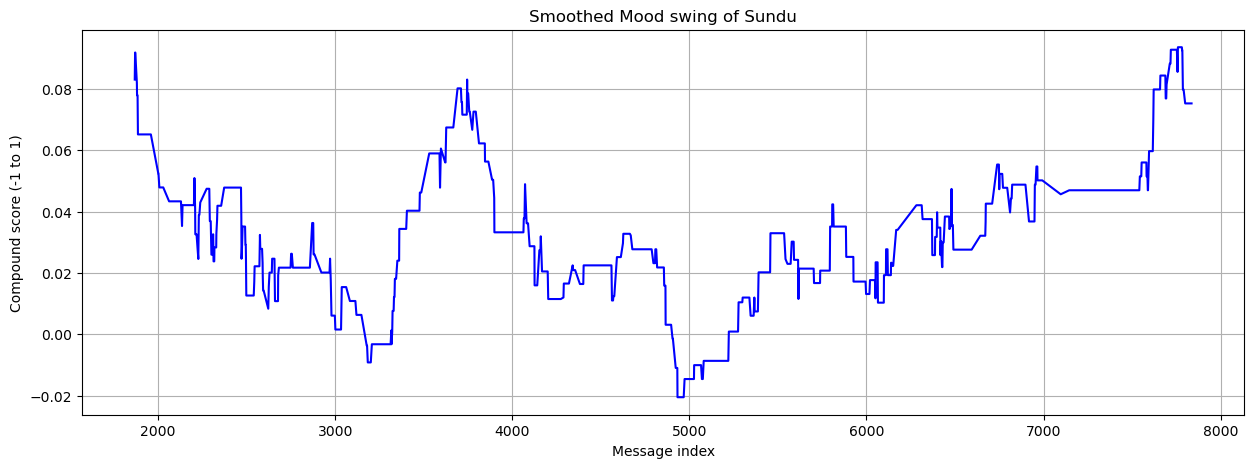

In [80]:
import matplotlib.pyplot as plt

# For one sender
sender = 'Sundu'
subset = data[data['Name'] == sender]

# Smooth using rolling window of 50 messages
subset['compound_smooth'] = subset['compound'].rolling(window=50).mean()

plt.figure(figsize=(15,5))
plt.plot(subset['compound_smooth'], color='blue')
plt.title(f"Smoothed Mood swing of {sender}")
plt.xlabel("Message index")
plt.ylabel("Compound score (-1 to 1)")
plt.grid(True)
plt.show()


## Model Creation

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [82]:
X = data['chat']
y = data['Sentiment']

vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       1.00      0.16      0.27        58
     Neutral       0.91      1.00      0.95       995
    Positive       0.98      0.70      0.82       186

    accuracy                           0.92      1239
   macro avg       0.96      0.62      0.68      1239
weighted avg       0.92      0.92      0.90      1239



In [83]:
data['flirt_pred'] = model.predict(
    vectorizer.transform(data['chat'])
)

data[['Name','chat','flirt_pred']].head()


C:\Users\anand\AppData\Local\Temp\ipykernel_21268\2678408789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['flirt_pred'] = model.predict(


,Name,chat,flirt_pred
3,DEENA,Pattamputchi to kambaliputchi,Neutral
4,DEENA,Is it true?,Positive
5,Karthi Yuvi,Terliye,Neutral
6,DEENA,Gn,Positive
9,Karthi Yuvi,Vadakku Patti ramasamy 3 gb,Neutral


## Talkative / Less Talkative (Message Counts)

In [84]:
counts = data['Name'].value_counts()

talkative_person = counts.idxmax()
talkative_count = counts.max()

less_talkative_person = counts.idxmin()
less_talkative_count = counts.min()

talkative_person, talkative_count, less_talkative_person, less_talkative_count


('DEENA', 1894, 'Karthi S', 16)

## Most Active Day & Hour

In [97]:
import pandas as pd

# Make sure Date and Time columns are clean
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)
data['Time'] = data['Time'].str.strip()

# Extract day
data['Day'] = data['Date'].dt.day_name()

# Extract hour (let pandas infer format automatically)
data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour

# Drop rows with missing values
data = data.dropna(subset=['Day', 'Hour'])

# Find most active day and hour
most_active_day = data['Day'].mode()[0]
most_active_hour = int(data['Hour'].mode()[0])
most_active_hour_formatted = pd.to_datetime(str(most_active_hour), format='%H').strftime('%I %p')

# Display both
print(f"Most active day: {most_active_day}, Most active hour: {most_active_hour_formatted}")


Most active day: Sunday, Most active hour: 09 PM


C:\Users\anand\AppData\Local\Temp\ipykernel_21268\2998240515.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour


## Mood Swing

In [ ]:
# Rolling sentiment (smaller window)
data['rolling_sentiment'] = data['compound'].rolling(window=3).mean()

# Smooth using larger window for visualization
window_size = 50
data['compound_smooth'] = data['compound'].rolling(window=window_size).mean()

import matplotlib.pyplot as plt

# Plot mood swing for each sender
for sender in data['Name'].unique():
    subset = data[data['Name'] == sender]
    plt.figure(figsize=(15,5))
    plt.plot(subset['compound_smooth'], label=f"{sender} Mood")
    plt.title(f"Smoothed Mood Swing of {sender}")
    plt.xlabel("Message index")
    plt.ylabel("Compound Score (-1 to 1)")
    plt.grid(True)
    plt.legend()
    plt.show()


## Triggers

In [ ]:
data['sentiment_drop'] = data['rolling_sentiment'].diff()
NEG_DROP_THRESHOLD = -0.2

triggers = data[data['sentiment_drop'] < NEG_DROP_THRESHOLD]

trigger_results = []
for idx in triggers.index:
    trigger_msg = data.loc[idx]
    next_msgs = data.loc[idx+1:idx+10]  # next 10 messages
    neg_count = (next_msgs['Sentiment'] == 'Negative').sum()
    
    trigger_results.append({
        'Trigger_Message': trigger_msg['chat'],
        'Trigger_By': trigger_msg['Name'],
        'Negative_Messages_After': neg_count
    })

trigger_df = pd.DataFrame(trigger_results)
trigger_df
